# **Credit Default Risk Prediction**

#### Environment Setup and Imports

Import all necessary packages for the analysis.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, accuracy_score
from xgboost import XGBClassifier

# Set plot style
sns.set(style='whitegrid')

#### Loading Data and the Overview

This step is set to load the two sets of data and print the output. Here, we directly import the data from the Internet instead of using local files.

In [10]:
# Load the datasets
train_url = "https://raw.githubusercontent.com/pranavpatel08/Credit-Default-Risk-Prediction/refs/heads/main/data/Train.csv"
validation_url = "https://raw.githubusercontent.com/pranavpatel08/Credit-Default-Risk-Prediction/refs/heads/main/data/Validation.csv"

train_data = pd.read_csv(train_url)
validation_data = pd.read_csv(validation_url)

# Display the first few rows of each dataset
print("Training Data:")
display(train_data.head())

print("\nValidation Data:")
display(validation_data.head())

# Print dataset information
print("\nTraining Data Info:")
train_data.info()

print("\nValidation Data Info:")
validation_data.info()

# Check basic statistics
print("\nTraining Data Description:")
print(train_data.describe())

print("\nValidation Data Description:")
print(validation_data.describe())


Training Data:


,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,card_open_36_month_num,auto_open_ 36_month_num,uti_card,uti_50plus_pct,uti_max_credit_line,uti_card_50plus_pct,ind_acc_XYZ,rep_income,States,Default_ind
0,80826.71,15872.99,300.0,114.0,292.0,0.0,0.0,0.0,0.00,3.0,...,0.0,0.0,0.365902,0.475594,0.410504,NaN,0.0,69000.0,AL,0.0
1,96052.60,12178.02,281.0,102.0,232.0,0.0,0.0,0.0,0.00,2.0,...,1.0,0.0,0.542786,0.543158,0.535147,0.587351,0.0,61000.0,FL,0.0
2,75212.76,12052.24,261.0,149.0,260.0,0.0,0.0,0.0,0.00,1.0,...,0.0,1.0,0.323678,0.321776,0.348713,0.413293,0.0,NaN,AL,0.0
3,70727.84,8416.80,227.0,93.0,223.0,2.0,1.0,1.0,11013.96,0.0,...,1.0,0.0,0.448721,0.422809,0.491365,0.466810,0.0,79000.0,SC,1.0
4,41604.47,10611.97,249.0,136.0,241.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.644030,0.619987,0.546655,0.588442,1.0,NaN,LA,0.0



Validation Data:


,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,card_open_36_month_num,auto_open_ 36_month_num,uti_card,uti_50plus_pct,uti_max_credit_line,uti_card_50plus_pct,ind_acc_XYZ,rep_income,States,Default_ind
0,63651.27,9019.99,484.0,242.0,395.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.619761,0.624652,0.506910,0.530109,0.0,66000.0,FL,1.0
1,105559.29,16692.19,212.0,118.0,211.0,0.0,0.0,0.0,0.0,4.0,...,0.0,1.0,0.428082,0.533489,0.340476,0.388792,0.0,55000.0,MS,0.0
2,96062.99,10509.13,255.0,123.0,180.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.437217,0.422643,0.418459,0.450523,0.0,86000.0,MS,0.0
3,84417.40,13873.96,330.0,175.0,328.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.651360,0.566563,0.399319,0.562153,0.0,110000.0,MS,0.0
4,100623.91,15592.09,207.0,101.0,128.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.586265,0.504849,0.652576,0.576409,1.0,NaN,NC,0.0



Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   tot_credit_debt                     20000 non-null  float64
 1   avg_card_debt                       20000 non-null  float64
 2   credit_age                          20000 non-null  float64
 3   credit_good_age                     20000 non-null  float64
 4   card_age                            20000 non-null  float64
 5   non_mtg_acc_past_due_12_months_num  20000 non-null  float64
 6   non_mtg_acc_past_due_6_months_num   20000 non-null  float64
 7   mortgages_past_due_6_months_num     20000 non-null  float64
 8   credit_past_due_amount              20000 non-null  float64
 9   inq_12_month_num                    20000 non-null  float64
 10  card_inq_24_month_num               20000 non-null  float64
 11  card_open_36_month_n

#### Exploratory Data Analysis

In this step, we are to check for missing values, summarize data statics, and visualize the distribution of key features.

Missing Values in Training Data (Percentage):
uti_card_50plus_pct    10.275
rep_income              7.850
dtype: float64

Missing Values in Validation Data (Percentage):
uti_card_50plus_pct    9.900000
rep_income             8.433333
dtype: float64


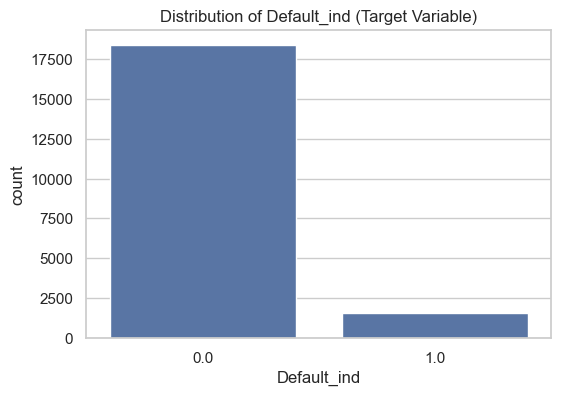

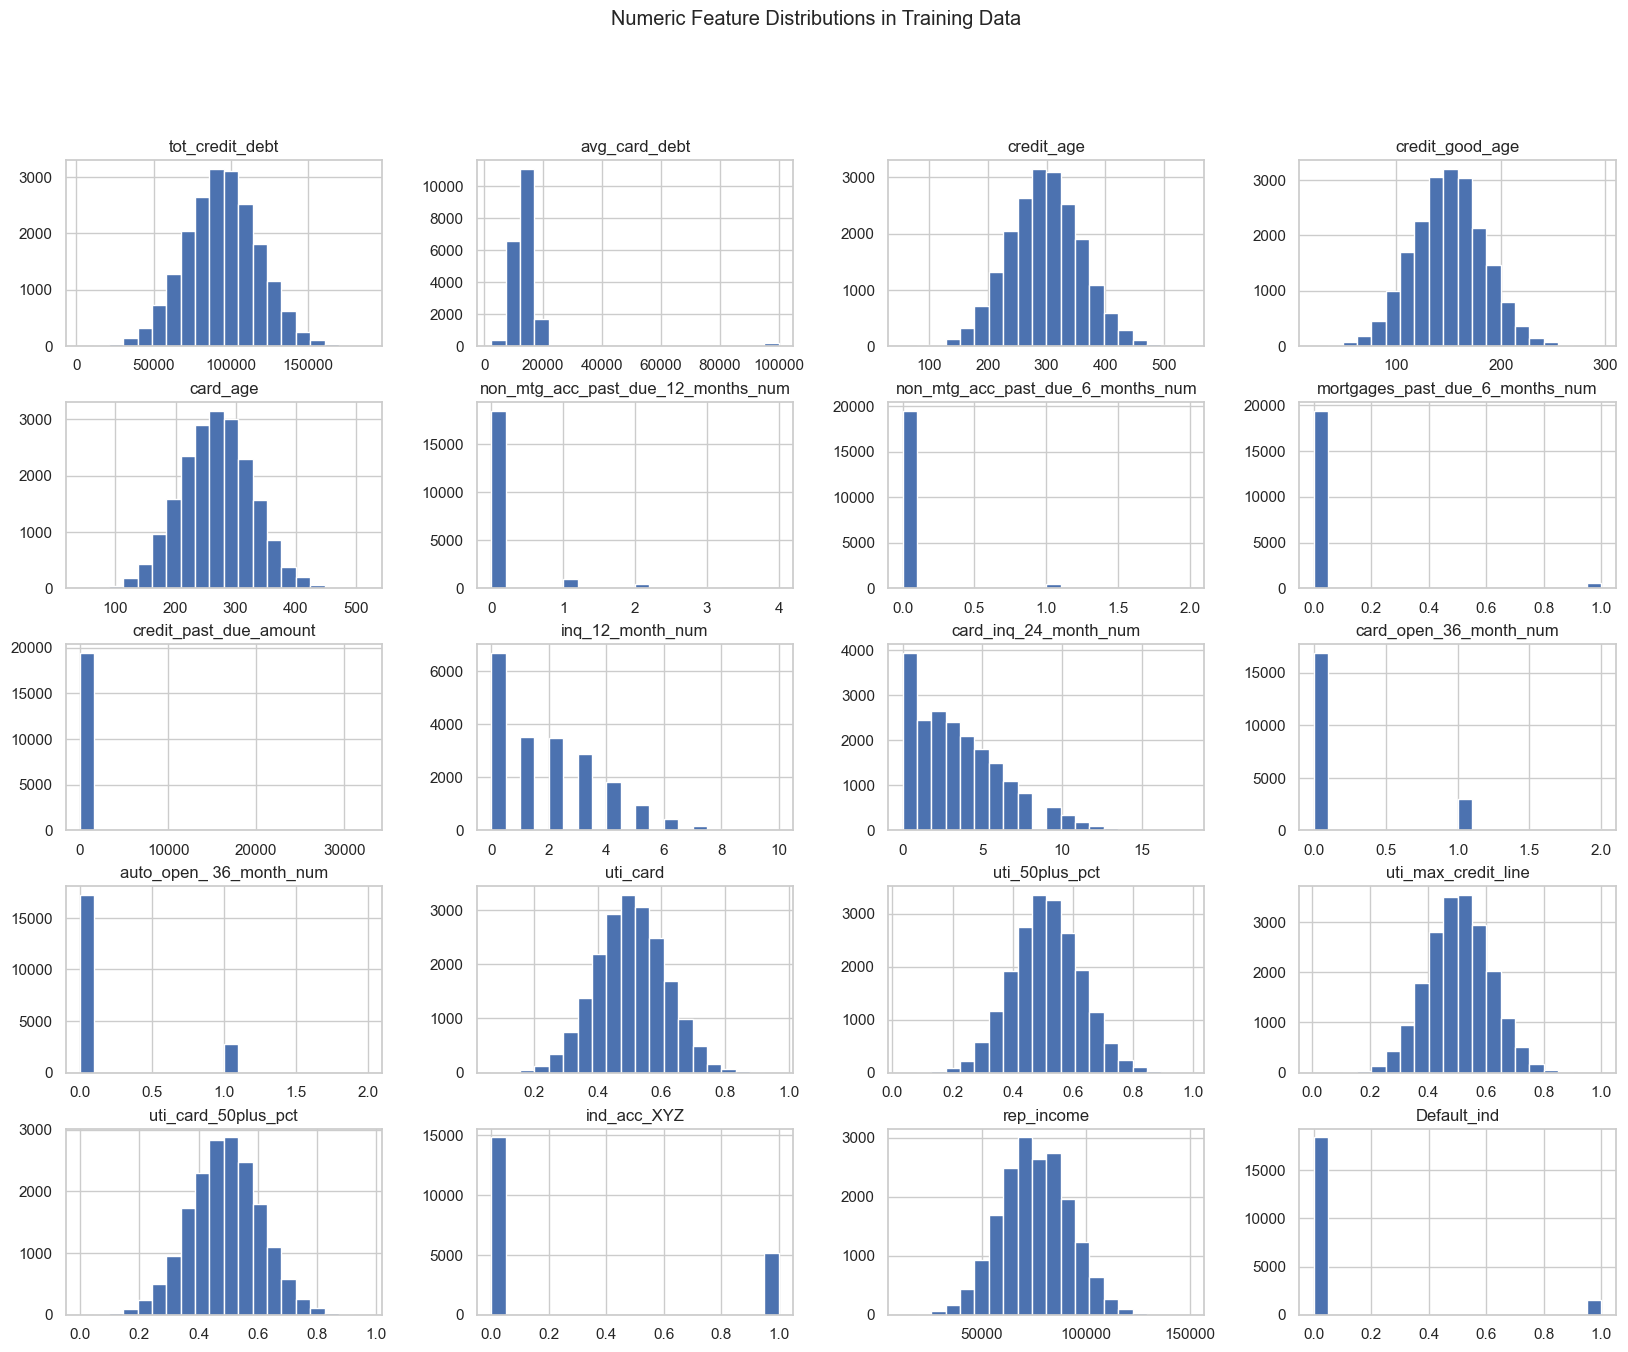

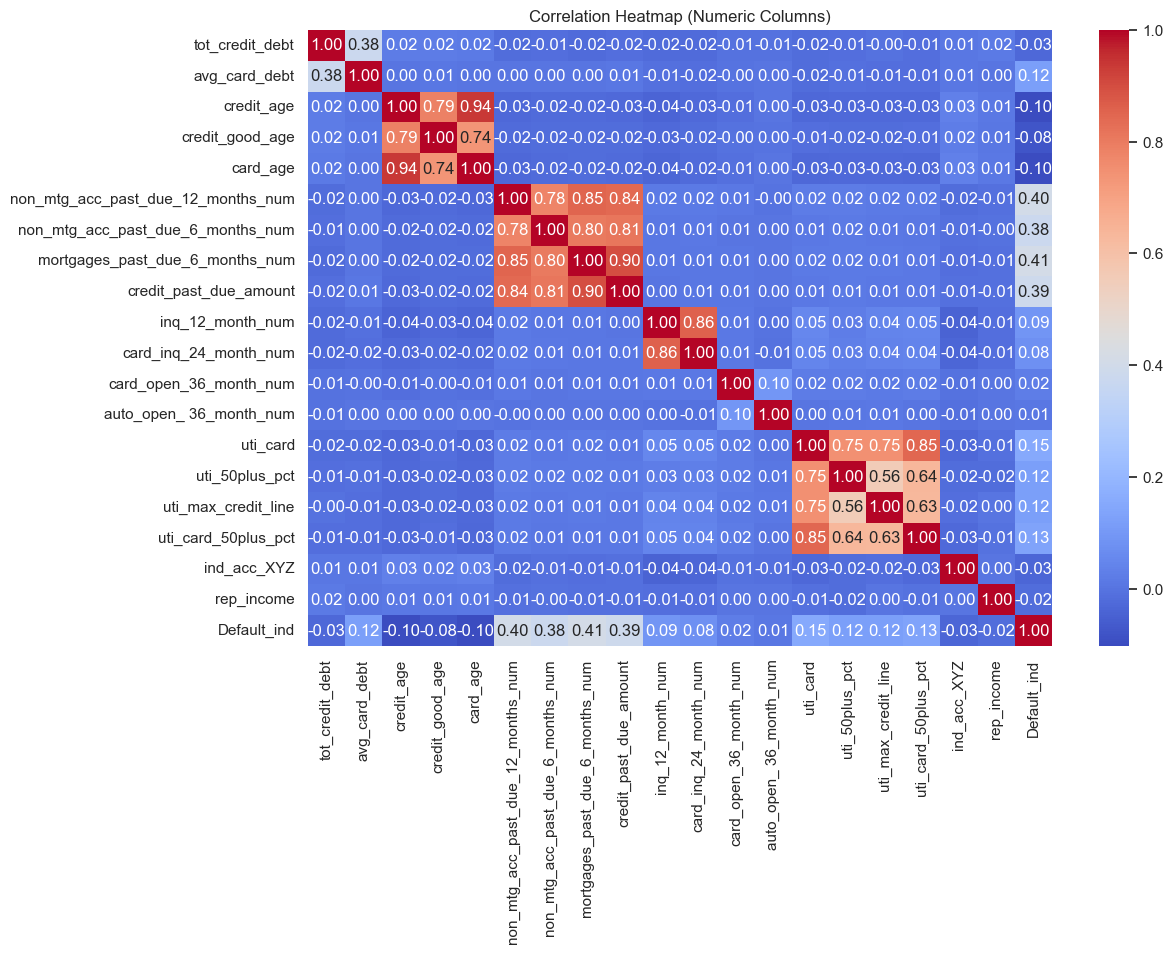

In [11]:
# Check for missing values
missing_train = train_data.isnull().sum() / len(train_data) * 100
missing_validation = validation_data.isnull().sum() / len(validation_data) * 100

print("Missing Values in Training Data (Percentage):")
print(missing_train[missing_train > 0])

print("\nMissing Values in Validation Data (Percentage):")
print(missing_validation[missing_validation > 0])

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='Default_ind')
plt.title("Distribution of Default_ind (Target Variable)")
plt.show()

# Plot histograms for numeric features in training data
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data[numeric_cols].hist(figsize=(20, 15), bins=20)
plt.suptitle("Numeric Feature Distributions in Training Data")
plt.show()

# Select only numeric columns for correlation computation
numeric_df = train_data.select_dtypes(include=[np.number])
# Show a correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()


#### Data Pre-processing

In this step, we are to handle missing values, encode categorical features, and normalize numeric features if needed.

In [12]:
# Define target variable and features
target = 'Default_ind'
categorical_features = ['States']
numeric_features = [col for col in train_data.columns if col not in categorical_features + [target]]

# Impute missing values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply transformations to training and validation data
X_train = train_data.drop(columns=[target])
y_train = train_data[target]

X_validation = validation_data.drop(columns=[target])
y_validation = validation_data[target]

X_train_processed = preprocessor.fit_transform(X_train)
X_validation_processed = preprocessor.transform(X_validation)

print("Preprocessing complete.")
print(f"Training features shape: {X_train_processed.shape}")
print(f"Validation features shape: {X_validation_processed.shape}")


Preprocessing complete.
Training features shape: (20000, 26)
Validation features shape: (3000, 26)


#### Logistic Regression Model

In this step, we are to create a logictic regression model using the training dataset and assess its performance using the validation dataset.

Logistic Regression Performance on Training Data:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     18414
         1.0       0.77      0.28      0.41      1586

    accuracy                           0.94     20000
   macro avg       0.85      0.64      0.69     20000
weighted avg       0.93      0.94      0.92     20000


Logistic Regression Performance on Validation Data:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2778
         1.0       0.71      0.30      0.42       222

    accuracy                           0.94      3000
   macro avg       0.83      0.65      0.70      3000
weighted avg       0.93      0.94      0.93      3000


Validation AUC-ROC: 0.8165


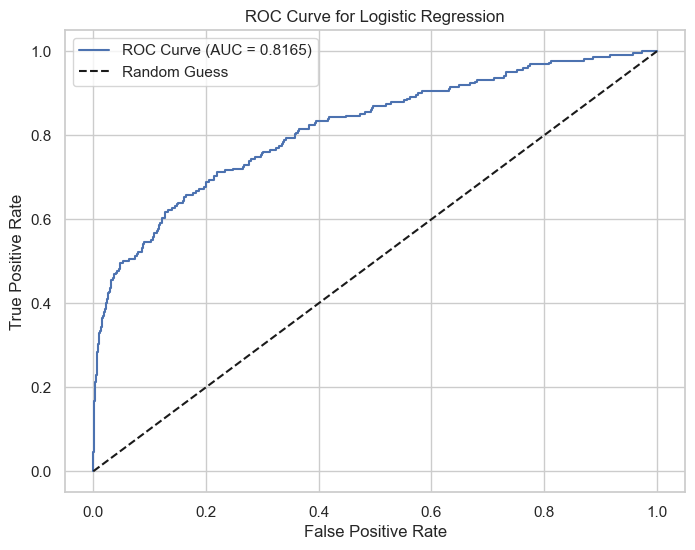


Feature Importance (Coefficients):
tot_credit_debt: -0.3013
avg_card_debt: 0.3734
credit_age: -0.2241
credit_good_age: -0.0317
card_age: -0.1682
non_mtg_acc_past_due_12_months_num: 0.4875
non_mtg_acc_past_due_6_months_num: 0.1637
mortgages_past_due_6_months_num: 0.2490
credit_past_due_amount: -0.0890
inq_12_month_num: 0.3272
card_inq_24_month_num: -0.0061
card_open_36_month_num: 0.0587
auto_open_ 36_month_num: 0.0241
uti_card: 0.6008
uti_50plus_pct: 0.0499
uti_max_credit_line: 0.0243
uti_card_50plus_pct: 0.0427
ind_acc_XYZ: -0.0985
rep_income: -0.0454
x0_AL: -0.3575
x0_FL: -0.4568
x0_GA: -0.4824
x0_LA: -0.3627
x0_MS: -0.3003
x0_NC: -0.4016
x0_SC: -0.2886


In [22]:
# Initialize and train the logistic regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_processed, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train_processed)
y_validation_pred = lr_model.predict(X_validation_processed)

# Evaluate the model
print("Logistic Regression Performance on Training Data:")
print(classification_report(y_train, y_train_pred))

print("\nLogistic Regression Performance on Validation Data:")
print(classification_report(y_validation, y_validation_pred))

# Calculate and display AUC-ROC
y_validation_pred_prob = lr_model.predict_proba(X_validation_processed)[:, 1]
roc_auc = roc_auc_score(y_validation, y_validation_pred_prob)
print(f"\nValidation AUC-ROC: {roc_auc:.4f}")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_validation, y_validation_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

# Print feature coefficients
print("\nFeature Importance (Coefficients):")
feature_names = numeric_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out())
for feature, coef in zip(feature_names, lr_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


#### Using gradient boosting on another Model

In this step, we are to create another machine learning model and train the model on the training dataset. Also, we are to evaluate its performance.

For the machine learning model, we will use gradient boosting.

Gradient Boosting Performance on Training Data:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     18414
         1.0       0.83      0.38      0.52      1586

    accuracy                           0.94     20000
   macro avg       0.89      0.69      0.74     20000
weighted avg       0.94      0.94      0.93     20000


Gradient Boosting Performance on Validation Data:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2778
         1.0       0.79      0.30      0.44       222

    accuracy                           0.94      3000
   macro avg       0.87      0.65      0.70      3000
weighted avg       0.94      0.94      0.93      3000


Validation AUC-ROC: 0.8736


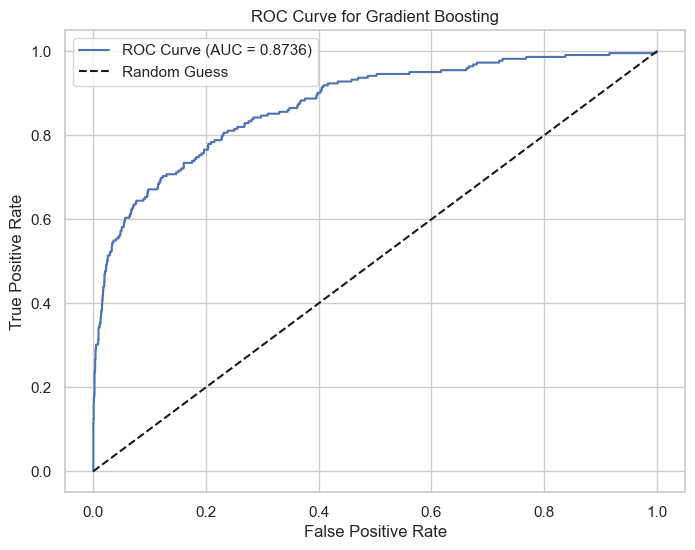


Feature Importance:
tot_credit_debt: 0.0153
avg_card_debt: 0.2322
credit_age: 0.0299
credit_good_age: 0.0128
card_age: 0.0139
non_mtg_acc_past_due_12_months_num: 0.3779
non_mtg_acc_past_due_6_months_num: 0.0556
mortgages_past_due_6_months_num: 0.0478
credit_past_due_amount: 0.0128
inq_12_month_num: 0.0507
card_inq_24_month_num: 0.0084
card_open_36_month_num: 0.0007
auto_open_ 36_month_num: 0.0006
uti_card: 0.0897
uti_50plus_pct: 0.0088
uti_max_credit_line: 0.0104
uti_card_50plus_pct: 0.0226
ind_acc_XYZ: 0.0002
rep_income: 0.0077
x0_AL: 0.0000
x0_FL: 0.0004
x0_GA: 0.0002
x0_LA: 0.0006
x0_MS: 0.0008
x0_NC: 0.0000
x0_SC: 0.0000


In [14]:
# Initialize and train Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_processed, y_train)

# Make predictions
y_train_pred_gb = gb_model.predict(X_train_processed)
y_validation_pred_gb = gb_model.predict(X_validation_processed)

# Evaluate the model
print("Gradient Boosting Performance on Training Data:")
print(classification_report(y_train, y_train_pred_gb))

print("\nGradient Boosting Performance on Validation Data:")
print(classification_report(y_validation, y_validation_pred_gb))

# Calculate and display AUC-ROC
y_validation_pred_prob_gb = gb_model.predict_proba(X_validation_processed)[:, 1]
roc_auc_gb = roc_auc_score(y_validation, y_validation_pred_prob_gb)
print(f"\nValidation AUC-ROC: {roc_auc_gb:.4f}")

# Plot the ROC Curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_validation, y_validation_pred_prob_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'ROC Curve (AUC = {roc_auc_gb:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting")
plt.legend()
plt.show()

# Feature Importance
feature_importances = gb_model.feature_importances_
feature_names = numeric_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out())
print("\nFeature Importance:")
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance:.4f}")


### Comparison of Two Models

In [ ]:
# Summarize model performance
comparison_metrics = {
    "Model": ["Logistic Regression", "Gradient Boosting"],
    "Validation Accuracy": [
        accuracy_score(y_validation, lr_model.predict(X_validation_processed)),
        accuracy_score(y_validation, gb_model.predict(X_validation_processed)),
    ],
    "Validation AUC-ROC": [
        roc_auc_score(y_validation, lr_model.predict_proba(X_validation_processed)[:, 1]),
        roc_auc_score(y_validation, gb_model.predict_proba(X_validation_processed)[:, 1]),
    ],
    "Default Recall (Class 1)": [
        classification_report(y_validation, lr_model.predict(X_validation_processed), output_dict=True)["1.0"]["recall"],
        classification_report(y_validation, gb_model.predict(X_validation_processed), output_dict=True)["1.0"]["recall"],
    ],
    "Default Precision (Class 1)": [
        classification_report(y_validation, lr_model.predict(X_validation_processed), output_dict=True)["1.0"]["precision"],
        classification_report(y_validation, gb_model.predict(X_validation_processed), output_dict=True)["1.0"]["precision"],
    ],
}

# Create a DataFrame for better visualization
comparison_df = pd.DataFrame(comparison_metrics)

# Display the comparison
print("Model Comparison Metrics:")
print(comparison_df)

Model Comparison Metrics:
                 Model  Validation Accuracy  Validation AUC-ROC  \
0  Logistic Regression             0.939333            0.816463   
1    Gradient Boosting             0.942333            0.873622   

   Default Recall (Class 1)  Default Precision (Class 1)  
0                  0.301802                     0.712766  
1                  0.301802                     0.788235  


#### Comparison Results

Both models perform well, with Gradient Boosting slightly outperforming Logistic Regression in distinguishing between classes.


<Figure size 1200x800 with 0 Axes>

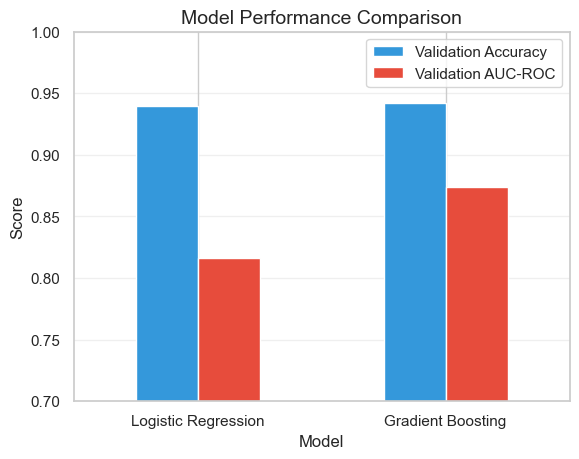

In [ ]:
# Create bar chart for comparison
plt.figure(figsize=(12, 8))
comparison_df.set_index('Model')[['Validation Accuracy', 'Validation AUC-ROC']].plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Model Performance Comparison', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim(0.7, 1.0)  # Setting a reasonable y-axis range
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)